# Introduction

This lab will walk you through an example of multi-output regression with decision tree. You will see how decision trees are used to predict simultaneously the noisy x and y observations of a circle given a single underlying feature. As a result, it learns local linear regressions approximating the circle.

# Import Libraries

In this step, we will import the necessary libraries which are numpy, matplotlib.pyplot, and DecisionTreeRegressor from sklearn.tree.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Create a Random Dataset

In this step, we will create a random dataset. We will use the **numpy** library to create a sorted array of 100 elements, with random values from 0 to 200, then subtract 100 from each element. Then we will use **numpy** to compute the sine and cosine of each element, and join these arrays together into a 2D array of shape (100, 2) to create the y array. We will also add random noise to every fifth element.

In [2]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(200 * rng.rand(100, 1) - 100, axis=0)
y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T
y[::5, :] += 0.5 - rng.rand(20, 2)

# Fit Regression Model

In this step, we will fit regression models. We will use **DecisionTreeRegressor** from sklearn.tree to fit three different models with different maximum depths.

In [3]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=8)
regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)

DecisionTreeRegressor(max_depth=8)

# Predict

In this step, we will make predictions using the models we created in the previous step. We will use **np.arange** to create a new array of values from -100 to 100 with an interval of 0.01, and then use predict method from our models to **predict** the output.

In [4]:
# Predict
X_test = np.arange(-100.0, 100.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

# Plot the Results

In this step, we will plot the results. We will use **matplotlib.pyplot** to create a scatter plot of the original data, and each of the three model predictions. We will also add labels and title to the plot.

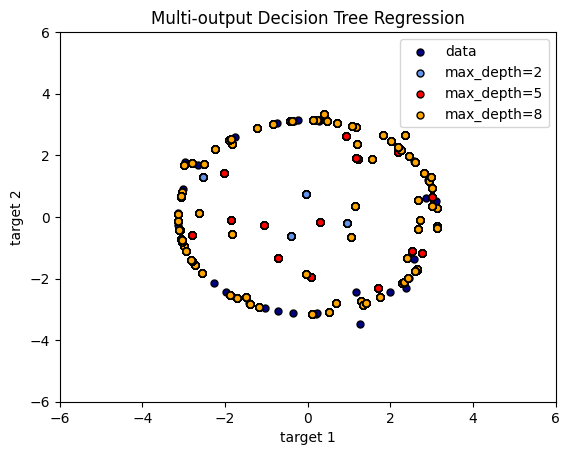

In [5]:
# Plot the results
plt.figure()
s = 25
plt.scatter(y[:, 0], y[:, 1], c="navy", s=s, edgecolor="black", label="data")
plt.scatter(
    y_1[:, 0],
    y_1[:, 1],
    c="cornflowerblue",
    s=s,
    edgecolor="black",
    label="max_depth=2",
)
plt.scatter(y_2[:, 0], y_2[:, 1], c="red", s=s, edgecolor="black", label="max_depth=5")
plt.scatter(
    y_3[:, 0], y_3[:, 1], c="orange", s=s, edgecolor="black", label="max_depth=8"
)
plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Multi-output Decision Tree Regression")
plt.legend(loc="best")
plt.show()

# Summary

In this lab, we learned how to use decision trees for multi-output regression. We created a random dataset, fit regression models, made predictions, and plotted the results. The decision trees learned local linear regressions approximating the circle. We also saw that if the maximum depth of the tree is set too high, the decision trees learn too fine details of the training data and learn from the noise, i.e. they overfit.